# Chapter 7: The Final Challenge
Paolo Perrotta, Programming Machine Learning: From Coding to Deep Learning (2020)

## Going Multinomial

• X is (m, n)—one row per example, and one column per input variable. The MNIST training set has 60,000 examples, each composed by 784 pixels. Add the bias column, and X becomes (60000, 785).
• Y is a matrix of one-hot-encoded labels. It has one row per example, and one column per class. If we use k for the number of classes, then Y is (m, k). In our case, that’s (60000, 10).
• The matrix of weights w is (n, k)—one row per input variable, and one column per class. In our case, that’s (785, 10).

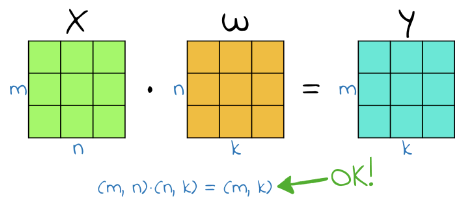

In [1]:
import numpy as np
import gzip
import struct

def load_images(filename):
    # Open and unzip the file of images:
    with gzip.open(filename, 'rb') as f:
        # Read the header information into a bunch of variables:
        _ignored, n_images, columns, rows = struct.unpack('>IIII', f.read(16))
        # Read all the pixels into a NumPy array:
        all_pixels = np.frombuffer(f.read(), dtype=np.uint8)
        # Reshape the pixels into a matrix where each line is an image:
        return all_pixels.reshape(n_images, columns * rows)


def prepend_bias(X):
    # Insert a column of 1s in the position 0 of X.
    # (“axis=1” stands for: “insert a column, not a row”)
    return np.insert(X, 0, 1, axis=1)


# 60000 images, each 785 elements (1 bias + 28 * 28 pixels), X_train is (60000,785) 
X_train = prepend_bias(load_images("train-images-idx3-ubyte.gz"))

# 10000 images, each 785 elements, with the same structure as X_train, X_test is (10000,785) 
X_test = prepend_bias(load_images("t10k-images-idx3-ubyte.gz"))


def load_labels(filename):
    # Open and unzip the file of images:
    with gzip.open(filename, 'rb') as f:
        # Skip the header bytes:
        f.read(8)
        # Read all the labels into a list:
        all_labels = f.read()
        # Reshape the list of labels into a one-column matrix:
        return np.frombuffer(all_labels, dtype=np.uint8).reshape(-1, 1)

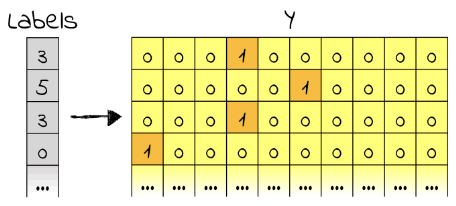

In [2]:
def one_hot_encode(Y):
    n_labels = Y.shape[0]
    n_classes = 10
    encoded_Y = np.zeros((n_labels, n_classes))
    for i in range(n_labels):
        label = Y[i]
        encoded_Y[i][label] = 1
    return encoded_Y

In [3]:
# 60K labels, each a single digit from 0 to 9
Y_train_unencoded = load_labels("train-labels-idx1-ubyte.gz")

# 60K labels, each consisting of 10 one-hot encoded elements
Y_train = one_hot_encode(Y_train_unencoded)

# 10000 labels, each a single digit from 0 to 9
Y_test = load_labels("t10k-labels-idx1-ubyte.gz")

## Moment of Truth

In [4]:
import numpy as np

def forward(X, w):
    weighted_sum = np.matmul(X, w)   # (N x 785) x (785 x 10) = N x 10
    return softmax(weighted_sum)

def softmax(logits):
    logits  = np.subtract(logits, np.max(logits)) # prevent overflow
    exponentials = np.exp(logits)                 # N x 10
    return exponentials / np.sum(exponentials, axis=1).reshape(-1, 1)  # N x 10 / N x 1 = N x 10

def predict(X, w):
    y_hat = forward(X, w)
    labels = np.argmax(y_hat, axis=1)
    return labels.reshape(-1, 1)

def loss(X, Y, w):
    y_hat = forward(X, w)
    return -np.sum(Y * np.log(y_hat)) / X.shape[0]

def gradient(X, Y, w):
    return np.matmul(X.T, (forward(X, w) - Y)) / X.shape[0]


def report(iteration, X_train, Y_train, w):
    # 注意 self.predict(X).shape 是 N x 1, 但是
    # Y_train.shape 是 N x 10, 必須在水平方向找到最大值後再變成 N x 1
    matches = np.count_nonzero(predict(X_train, w) == np.argmax(Y_train, axis=1).reshape(-1,1))
    n_test_examples = Y_train.shape[0]
    matches = matches * 100.0 / n_test_examples
    training_loss = loss(X_train, Y_train, w)
    print("%d - Loss: %.20f, %.2f%%" % (iteration, training_loss, matches))


def train(X_train, Y_train, iterations, lr):
    w = np.zeros((X_train.shape[1], Y_train.shape[1]))
    for i in range(iterations):
        if i % 20 == 0:
            report(i, X_train, Y_train, w)
        w -= gradient(X_train, Y_train, w) * lr
    report(iterations, X_train, Y_train, w)
    return w

In [5]:
w = train(X_train, Y_train, iterations=200, lr=1e-5) # iterations = 200

0 - Loss: 2.30258509299404368065, 9.87%
20 - Loss: 0.55231327116040196401, 86.44%
40 - Loss: 0.45615562085755945176, 88.16%
60 - Loss: 0.41619338585117832130, 88.88%
80 - Loss: 0.39283271098835054191, 89.43%
100 - Loss: 0.37704729586459978519, 89.73%
120 - Loss: 0.36545374914806794120, 90.00%
140 - Loss: 0.35646518998592957583, 90.18%
160 - Loss: 0.34922649590937787645, 90.37%
180 - Loss: 0.34323080755386420337, 90.53%
200 - Loss: 0.33815601481437285170, 90.62%


In [6]:
# Testing

predictions = predict(X_test, w)
Accuracy = np.count_nonzero(predictions == Y_test)* 100.0 /Y_test.shape[0]
print("Testing accuracy: %.2f%%" % (Accuracy))

Testing accuracy: 91.10%


def softmax(logits):
    logits  = np.subtract(logits, np.max(logits)) # prevent overflow
    exponentials = np.exp(logits)                 # N x 10
    return exponentials / np.sum(exponentials, axis=1).reshape(-1, 1)  # N x 10 / N x 1 = N x 10

In [7]:
a=np.array([[1,2], [3,4]]) 
print(a)

[[1 2]
 [3 4]]


In [8]:
np.sum(a, axis=1)

array([3, 7])

In [9]:
c=np.sum(a, axis=1).reshape(-1, 1)
print(c)

[[3]
 [7]]


In [10]:
a/c

array([[0.33333333, 0.66666667],
       [0.42857143, 0.57142857]])